In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Morakinyo Adewale\Downloads\f3c42c46-e2a1-14b1-4737-b29e-3dc3a505\archive (1)\Global_Superstore2.csv', encoding='unicode_escape')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [12]:
from datetime import datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format= '%Y-%m-%d')
df['Order Year'] = df['Order Date'].dt.year

In [33]:
# Generating revenue column
df['Revenue'] = df['Sales'] * df['Quantity']

In [35]:
# Calculate frequency of purchase for each customer.
purchase_freq = df.groupby(['Order Year', 'Customer Name'])
purchase_frequency = purchase_freq.agg({'Customer Name':'count', 'Unique Customers': 'min', 'Revenue':'sum', 'Profit':'sum'}) 
purchase_frequency

Customer Name  Unique Customers      Revenue   
Order Year Customer Name                                                      
2011       Aaron Bergman                  14               795   2693.78200  \
           Aaron Hawkins                  15               795  47418.92150   
           Aaron Smayling                  8               795  12117.70000   
           Adam Bellavance                 6               795   9210.63210   
           Adam Hart                      19               795  25909.57552   
...                                      ...               ...          ...   
2014       Xylona Preis                   13               794  13240.71500   
           Yana Sorensen                  20               794  47494.72200   
           Yoseph Carroll                 13               794  27667.53400   
           Zuschuss Carroll               28               794  24306.65600   
           Zuschuss Donatelli             14               794   8581.31970   

                                   Profit  
Order Year Customer Name                   
2011       Aaron Bergman        189.26450  
           Aaron Hawkins       1528.25570  
           Aaron Smayling       180.54020  
           Adam Bellavance      370.65270  
           Adam Hart            322.34912  
...                                   ...  
2014       Xylona Preis         210.67240  
           Yana Sorensen       2175.74250  
           Yoseph Carroll       549.72100  
           Zuschuss Carroll     960.92900  
           Zuschuss Donatelli   468.34770  

[3179 rows x 4 columns]

In [109]:
#Renaming Customer Name column 
purchase_frequency.rename(mapper={'Customer Name': 'Purchase_for_year'}, axis=1, inplace=True)

In [113]:
# Calculating purchase frequency for each customers
purchase_frequency['Purchase Frequency'] = purchase_frequency['Purchase_for_year']/purchase_frequency['Unique Customers'] * 100
purchase_frequency

Purchase_for_year  Unique Customers   
Order Year Customer Name                                             
2011       Aaron Bergman                      14               795  \
           Aaron Hawkins                      15               795   
           Aaron Smayling                      8               795   
           Adam Bellavance                     6               795   
           Adam Hart                          19               795   
...                                          ...               ...   
2014       Xylona Preis                       13               794   
           Yana Sorensen                      20               794   
           Yoseph Carroll                     13               794   
           Zuschuss Carroll                   28               794   
           Zuschuss Donatelli                 14               794   

                                   Revenue      Profit  Purchase Frequency   
Order Year Customer Name                                                     
2011       Aaron Bergman        2693.78200   189.26450            1.761006  \
           Aaron Hawkins       47418.92150  1528.25570            1.886792   
           Aaron Smayling      12117.70000   180.54020            1.006289   
           Adam Bellavance      9210.63210   370.65270            0.754717   
           Adam Hart           25909.57552   322.34912            2.389937   
...                                    ...         ...                 ...   
2014       Xylona Preis        13240.71500   210.67240            1.637280   
           Yana Sorensen       47494.72200  2175.74250            2.518892   
           Yoseph Carroll      27667.53400   549.72100            1.637280   
           Zuschuss Carroll    24306.65600   960.92900            3.526448   
           Zuschuss Donatelli   8581.31970   468.34770            1.763224   

                              Frequency Range  
Order Year Customer Name                       
2011       Aaron Bergman                  Low  
           Aaron Hawkins                  Low  
           Aaron Smayling                 Low  
           Adam Bellavance                Low  
           Adam Hart                      Mid  
...                                       ...  
2014       Xylona Preis                   Low  
           Yana Sorensen                  Mid  
           Yoseph Carroll                 Low  
           Zuschuss Carroll               Mid  
           Zuschuss Donatelli             Low  

[3179 rows x 6 columns]

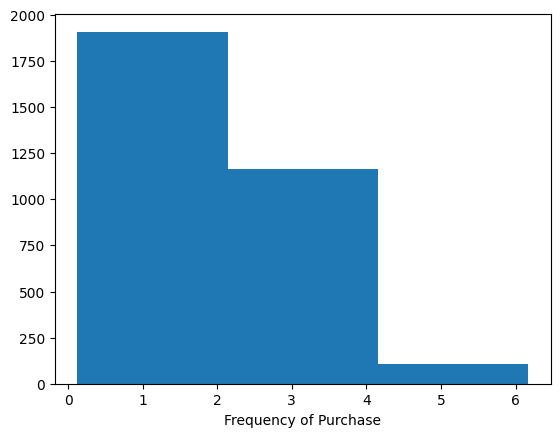

In [103]:
# Purchase Frequency distribution for all customers
plt.hist(purchase_frequency['Purchase Frequency'], bins=3)
plt.xlabel('Frequency of Purchase')
plt.show()

In [106]:
def frequency_profile(x):
    if x < 2.1:
        return 'Low'
    elif x < 4.1:
        return 'Mid'
    else:
        return 'High'

purchase_frequency['Frequency Range'] = purchase_frequency['Purchase Frequency'].apply(frequency_profile)
purchase_frequency

Purchase_for_year  Unique Customers   
Order Year Customer Name                                             
2011       Aaron Bergman                      14               795  \
           Aaron Hawkins                      15               795   
           Aaron Smayling                      8               795   
           Adam Bellavance                     6               795   
           Adam Hart                          19               795   
...                                          ...               ...   
2014       Xylona Preis                       13               794   
           Yana Sorensen                      20               794   
           Yoseph Carroll                     13               794   
           Zuschuss Carroll                   28               794   
           Zuschuss Donatelli                 14               794   

                                   Revenue      Profit  Purchase Frequency   
Order Year Customer Name                                                     
2011       Aaron Bergman        2693.78200   189.26450            1.761006  \
           Aaron Hawkins       47418.92150  1528.25570            1.886792   
           Aaron Smayling      12117.70000   180.54020            1.006289   
           Adam Bellavance      9210.63210   370.65270            0.754717   
           Adam Hart           25909.57552   322.34912            2.389937   
...                                    ...         ...                 ...   
2014       Xylona Preis        13240.71500   210.67240            1.637280   
           Yana Sorensen       47494.72200  2175.74250            2.518892   
           Yoseph Carroll      27667.53400   549.72100            1.637280   
           Zuschuss Carroll    24306.65600   960.92900            3.526448   
           Zuschuss Donatelli   8581.31970   468.34770            1.763224   

                              Frequency Range  
Order Year Customer Name                       
2011       Aaron Bergman                  Low  
           Aaron Hawkins                  Low  
           Aaron Smayling                 Low  
           Adam Bellavance                Low  
           Adam Hart                      Mid  
...                                       ...  
2014       Xylona Preis                   Low  
           Yana Sorensen                  Mid  
           Yoseph Carroll                 Low  
           Zuschuss Carroll               Mid  
           Zuschuss Donatelli             Low  

[3179 rows x 6 columns]

In [160]:
# Did the high frequent customers contributed more revenue?
Revenue_contribution = purchase_frequency.groupby('Frequency Range', as_index=False)['Revenue'].sum()
Revenue_contribution.to_csv('revenue contribution.txt')
Revenue_contribution

,Frequency Range,Revenue
0,High,5.124434e+06
1,Low,2.338560e+07
2,Mid,3.331124e+07


Text(0.5, 0, 'Revenue')

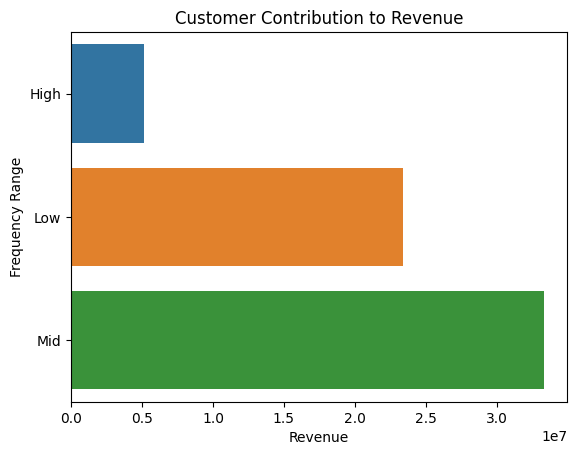

In [161]:
Revenue_cont = sns.barplot(y='Frequency Range', x='Revenue', data=Revenue_contribution, orient='h') 
Revenue_cont.set_title('Customer Contribution to Revenue')
Revenue_cont.set_xlabel('Revenue')


In [156]:
# What is the profit margin across the buckets?
profit_margin = purchase_frequency.groupby('Frequency Range', as_index=False)['Profit'].sum()
profit_margin.to_csv('profit margin.txt')
profit_margin

,Frequency Range,Profit
0,High,118050.41822
1,Low,548305.18812
2,Mid,801101.68494


Text(0.5, 1.0, 'Profit margin across the buckets')

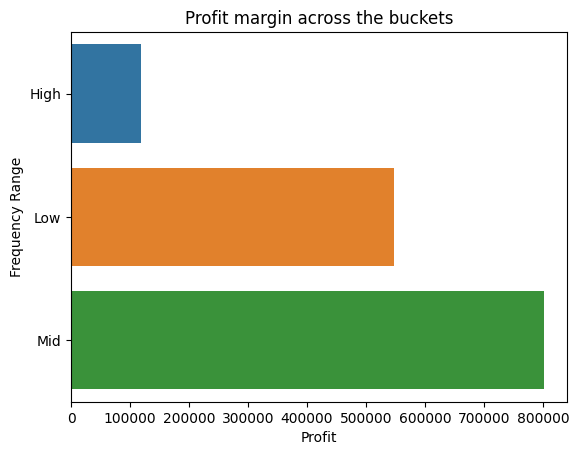

In [130]:
profit_margin_plot = sns.barplot(x='Profit', y='Frequency Range', data=profit_margin, orient='h')
profit_margin_plot.set_title('Profit margin across the buckets')

In [158]:
# Which customer segment is more profitable?
profitable_segment = df.groupby('Segment', as_index=False)['Profit'].sum()
profitable_segment.to_csv('profitable segment.txt')
profitable_segment

,Segment,Profit
0,Consumer,749239.78206
1,Corporate,441208.32866
2,Home Office,277009.18056


Text(0.5, 1.0, 'Most Profitable Segment by Profit')

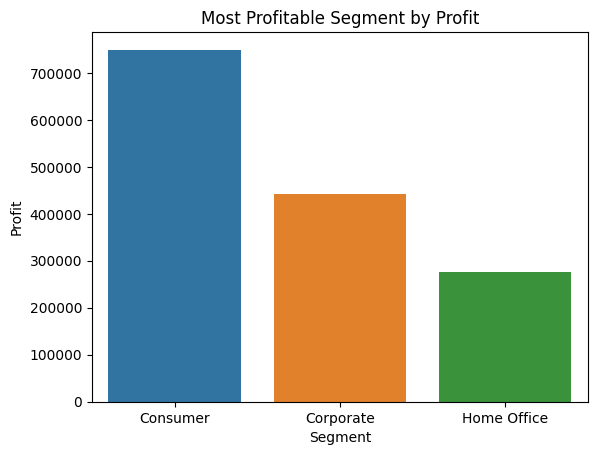

In [139]:
segment = sns.barplot(x='Segment', y='Profit', data=profitable_segment)
segment.set_title('Most Profitable Segment by Profit')

In [159]:
# How are customers distributed across the countries?
customer_distribution = df.groupby('Country', as_index=False)['Customer Name'].count()
customer_dist = customer_distribution.sort_values(by='Customer Name', ascending=False)
customer_dist.to_csv('Customer Distribution.txt')
customer_dist

,Country,Customer Name
139,United States,9994
6,Australia,2837
44,France,2827
81,Mexico,2644
47,Germany,2065
...,...,...
40,Eritrea,2
122,Swaziland,2
19,Burundi,2
24,Chad,2


Text(0.5, 0, 'Customer Count')

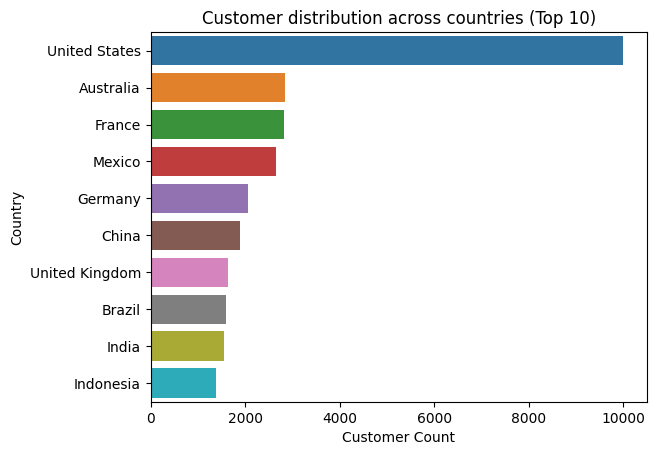

In [148]:
country_distribution1 = customer_dist[:10]
country_distribution = sns.barplot(x='Customer Name', y='Country', data=country_distribution1, orient='h')
country_distribution.set_title('Customer distribution across countries (Top 10)')
country_distribution.set_xlabel('Customer Count')

In [ ]:
"""
CONCLUSION: 
It can be seen from the histogram that the store has large number of low purchase frequency customers, followed by mid purchase frequency customers
and a very low quantity of high purchase frequency customers. 

1. Did the high frequent customers contributed the most revenue?
High frequent customers didnt contribute more revenue, mid frequent customers generated the most revenue, which was more than 
$33.3 million. Low frequent generated the next highest revenue, which was almost $23.4 million. 
2. What is the profit margin across purchase frequency buckets?
Mid frequent customers generated the highest profit, a little above $800,000, followed by low frequent customers. The profit was just below 
$550,000 and high frequent customers generated the lowest profit.
3. What is the most profitable customer segment?
The most profitable customer segment was consumer, followed by corporate and home office respectively.
4. What is the customer distribution across the countries?
There are more customers in the United States than other countries, almost 10,000 customers are in the U.S. Then, Austrailia, France, Mexico, etc.
"""